# Apresentação:

        Código legado adaptado para trabalhar com a região da Bahia
    de modo a elaborar construções gráficas sobre os dados de aerossóis.
    
### Código Original: https://github.com/becalyra/CALIPSO

# Bibliotecas:

In [9]:
import os
from pyhdf.SD import SD, SDC
import pandas as pd
import json
from processamento_dados import (selecao_area,
                                 controle_qualidade, porcentagem_valida,
                                 calc_media_espacial,
                                 calc_media_sazonal_1d, calc_media_sazonal_2d,
                                 calc_media_sazonal_anual_1d, calc_media_sazonal_anual_2d,
                                 convert_dicionario_1d_dataframe, convert_dicionario_2d_dataframe,
                                 preenchendo_dados,  calc_soma_deteccoes_coluna,hdf_path)
from plot_graficos import (plot_media_deteccoes_1d, plot_deteccoes_sazonais_2d, plot_coeficiente_extincao,
                           plot_multiplo_perfil_deteccao, plots_multiplos_perfil_ce_eoa,
                           plot_media_movel_deteccoes_eoa, plot_media_movel_deteccoes_2d)


# Importação dos dados:

In [10]:
perg = input('Qual o diretório?\n')

if perg == 'lasa':
    dir1 = r'C:\\Users\\amori\\OneDrive\\Documentos\\LASA\\Dados\\L2_VFM'
    dir2 = r'C:\Users\amori\OneDrive\Documentos\LASA\Dados\download_L3'
    
if perg == 'casa':
    dir1 = r'D:\Estudo\LASA\Dados\Bahia\L2_VFM'
    dir2 = r'D:\Estudo\LASA\Dados\Bahia\L3_Total'

Qual o diretório?
casa


In [11]:
# Inervalo de Tempo:
ano_inicial = input('Data de Inicio(Ano): ')
ano_final = input('Data de Final(Ano): ')

    
if ano_inicial == '':
    ano_inicial = '2006'
    
elif int(ano_inicial) < 2006:
    print('Não existe valores anteriores a 2006')

    
if ano_final == '':
    ano_final = '2022'
    
elif int(ano_final) > 2022:
    print('Não existe valores maiores que 2022')

files = hdf_path(dir2, [ano_inicial,ano_final])

Data de Inicio(Ano): 
Data de Final(Ano): 2016


In [13]:
info = {
  "Produtos": {
    "Vertical_Feature_Mask": {
      "Diretório": dir1,
      "Classificacao_elementos": {
        "Tipos_elementos": {
          "Bits": {
            "0": "Inválido",
            "1": "Ar limpo",
            "2": "Nuvem",
            "3": "Aerossol troposférico",
            "4": "Aerossol estratosférico",
            "5": "Superfície",
            "6": "Subsuperfície",
            "7": "Sem sinal"
          }
        },
        "Aerossóis_Troposféricos": {
          "Bits": {
            "0": "Não determinado",
            "1": "Marinho Limpo",
            "2": "Poeira",
            "3": "Poluição Continental/Fumaça",
            "4": "Continental Limpo",
            "5": "Poeira Poluída",
            "6": "Fumaça Elevada",
            "7": "Poeira Marinha"
          }
        },
        "Aerossóis_Estratosféricos": {
          "Bits": {
            "0": "Inválido",
            "1": "Aerosol PSC",
            "2": "Cinza Vulcânica",
            "3": "Sulfato/Outro",
            "4": "Fumaça Elevada"
          }
        }
      }
    },
    "Tropospheric_Aerosol_Profile": {
      "Diretório": dir2,
      "Variáveis": {
        "Extinction_Coefficient_532_Mean": {
          "Tradução": "Coeficiente de Extinção - Total",
          "Nome_eixo": "Coeficiente de Extinção (km-1)",
          "Limites_detecção": [
            0,
            4
          ],
          "Cor": "gray"
        },
        "Extinction_Coefficient_532_Mean_Dust": {
          "Tradução": "Coeficiente de Extinção - Poeira",
          "Nome_eixo": "Coeficiente de Extinção (km-1)",
          "Limites_detecção": [
            0,
            4
          ],
          "Cor": "darkorange"
        },
        "Extinction_Coefficient_532_Mean_Elevated_Smoke": {
          "Tradução": "Coeficiente de Extinção - Fumaça Elevada",
          "Nome_eixo": "Coeficiente de Extinção (km-1)",
          "Limites_detecção": [
            0,
            4
          ],
          "Cor": "rebeccapurple"
        },
        "Extinction_Coefficient_532_Mean_Polluted_Dust": {
          "Tradução": "Coeficiente de Extinção - Poeira Poluída",
          "Nome_eixo": "Coeficiente de Extinção (km-1)",
          "Limites_detecção": [
            0,
            4
          ],
          "Cor": "saddlebrown"
        },
        "AOD_Mean": {
          "Tradução": "Espessura Óptica dos Aerossóis - Total",
          "Nome_eixo": "EOA",
          "Limites_detecção": [
            0,
            5
          ],
          "Cor": "gray"
        },
        "AOD_Mean_Dust": {
          "Tradução": "Espessura Óptica dos Aerossóis - Poeira",
          "Nome_eixo": "EOA",
          "Limites_detecção": [
            0,
            5
          ],
          "Cor": "darkorange"
        },
        "AOD_Mean_Elevated_Smoke": {
          "Tradução": "Espessura Óptica dos Aerossóis - Fumaça Elevada",
          "Nome_eixo": "EOA",
          "Limites_detecção": [
            0,
            5
          ],
          "Cor": "rebeccapurple"
        },
        "AOD_Mean_Polluted_Dust": {
          "Tradução": "Espessura Óptica dos Aerossóis - Poeira Poluída",
          "Nome_eixo": "EOA",
          "Limites_detecção": [
            0,
            5
          ],
          "Cor": "saddlebrown"
        },
        "Samples_Aerosol_Detected_Accepted": {
          "Tradução": "Detecção de Aerossóis",
          "Nome_eixo": "Detecções (pixel)",
          "Limites_detecção": [
            0,
            32767
          ],
          "Cores": {
            "INVERNO": "royalblue",
            "OUTONO": "red",
            "PRIMAVERA": "darkorange",
            "VERÃO": "forestgreen"
          }
        },
        "Aerosol_Type": {
          "Tradução": "Detecções de Aerossóis por Tipo",
          "Nome_eixo": "Detecções (pixel)",
          "Limites_detecção": [
            0,
            32767
          ],
          "Tipos_Aerossóis": {
            "Marinho Limpo": "royalblue",
            "Poeira": "darkorange",
            "Poluição Continental/Fumaça": "red",
            "Continental Limpo": "green",
            "Poeira Poluída": "saddlebrown",
            "Fumaça Elevada": "rebeccapurple",
            "Poeira Marinha": "pink"
          }
        }
      }
    }
  },
  "Áreas_estudo": {
    "L3_VFM_A1": {
      "Coordenadas": {
        "Latitudes": [
          -11,
          -15
        ],
        "Longitudes": [
          -40,
          -37
         ]
      }
    },
    "L3_VFM_A2": {
      "Coordenadas": {
        "Latitudes": [
          -9.25,
          -11
        ],
        "Longitudes": [
          -40,
          -38.5
        ]
      }
    },
    "L3_VFM_A3": {
      "Coordenadas": {
        "Latitudes": [
          -10,
          -11.5
        ],
        "Longitudes": [
          -41.5,
          -40
        ]
      }
    },
    "L3_VFM_A4": {
      "Coordenadas": {
        "Latitudes": [
          -11.5,
          -14.5
        ],
        "Longitudes": [
          -41.75,
          -39.5
        ]
      }
    },
    "L3_VFM_A5": {
      "Coordenadas": {
        "Latitudes": [
          -11,
          -14
        ],
        "Longitudes": [
          -43,
          -41
        ]
      }
    }
  }
}

# Tratamento da Informação:

In [14]:
# Variável contendo informações do produto de perfil de aerossóis troposféricos
info_produto = info['Produtos']['Tropospheric_Aerosol_Profile']

#files = [f.path for f in os.scandir(info_produto['Diretório'])]

niveis_altitude = SD(files[0], SDC.READ).select('Altitude_Midpoint').get()[0]
perfil_media_sazonal_anual = {}
perfil_media_sazonal = {}
dados = {}
for area, info_area in list(info['Áreas_estudo'].items()):
    # Cria um dicionário vazio para cada área
    perfil_media_sazonal_anual[area] = {}
    perfil_media_sazonal[area] = {}
    dados[area] = {}
    for variavel, info_variavel in info_produto["Variáveis"].items():
        # Cria uma chave no dicionário para cada variável
        dados[area][variavel] = {}
        coordenadas = info_area['Coordenadas']
        for file in files:
            dado = SD(file, SDC.READ)
            # Abre cada arquivo listado
            # Seleciona dados de cada variável fazendo corte de área
            dado = selecao_area(dado, coordenadas, variavel)
            dado = controle_qualidade(dado, info_variavel['Limites_detecção'])
            # Adicionar mês ao dicionário apenas quando 80% dos dados passam no CQ
            if porcentagem_valida(dado) >= 0.8:
                dados[area][variavel][file[-12:-5]] = calc_media_espacial(dado)

        if variavel == 'Aerosol_Type':
            # Transforma array contendo classificação dos aerossóis em dataframe com colunas correspondendo a cada tipo de aerossol
            dados[area][variavel] = convert_dicionario_2d_dataframe(dados[area][variavel], info_variavel)
            # Salvando df com médias sazonais para cada ano e tipo de aerossol na chave da variável de detecção de aerossóis por tipo
            perfil_media_sazonal_anual[area][variavel] = calc_media_sazonal_anual_2d(dados[area][variavel])
            perfil_media_sazonal[area][variavel] = calc_media_sazonal_2d(perfil_media_sazonal_anual[area][variavel])
        else:
            # Salvando df com as médias sazonais para cada ano de cada variável de perfil único na chave da variável
            perfil_media_sazonal_anual[area][variavel] = calc_media_sazonal_anual_1d(dados[area][variavel])
            # Salvando df com as médias sazonais do período para cada variável de perfil único na chave da variável
            perfil_media_sazonal[area][variavel] = calc_media_sazonal_1d(perfil_media_sazonal_anual[area][variavel])
        
        if 'Ext' not in variavel:
            # Calcula a soma das detecções para a coluna
            dados[area][variavel] = calc_soma_deteccoes_coluna(dados[area][variavel])
            # Tranformando dicionário em df
            dados[area][variavel] = convert_dicionario_1d_dataframe(dados[area][variavel])
            dados[area][variavel] = preenchendo_dados(dados[area][variavel])

    dados[area]['AOD'] = pd.concat({variavel: valor for variavel, valor in dados[area].items() if 'AOD' in variavel}, axis=1).droplevel(1, axis=1)


C:\Users\amori\Jupyter Notebook\OneDrive\LASA\Pasta_arquivos\processamento_dados.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.nanmean(dado, axis=0), axis=0)
C:\Users\amori\Jupyter Notebook\OneDrive\LASA\Pasta_arquivos\processamento_dados.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.nanmean(dado, axis=0), axis=0)
C:\Users\amori\Jupyter Notebook\OneDrive\LASA\Pasta_arquivos\processamento_dados.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.nanmean(dado, axis=0), axis=0)
C:\Users\amori\Jupyter Notebook\OneDrive\LASA\Pasta_arquivos\processamento_dados.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.nanmean(dado, axis=0), axis=0)
C:\Users\amori\Jupyter Notebook\OneDrive\LASA\Pasta_arquivos\processamento_dados.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.nanmean(dado, axis=0), axis=0)
C:\Users\amori\Jupyter Notebook\OneDrive\LASA\Pasta_arquivos\processamento_dados.py:150: RuntimeWarning: 

# Visualização:

Deu merda no gráfico do plots_multiplos_perfil_ce_eoa
Deu merda no gráfico do plots_multiplos_perfil_ce_eoa


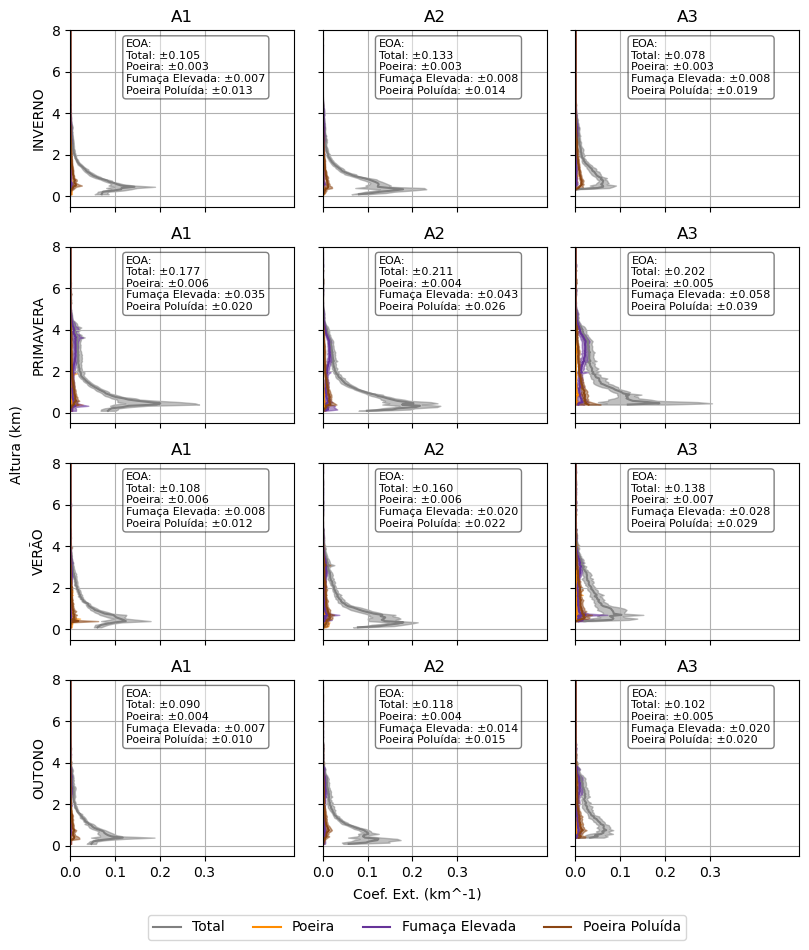

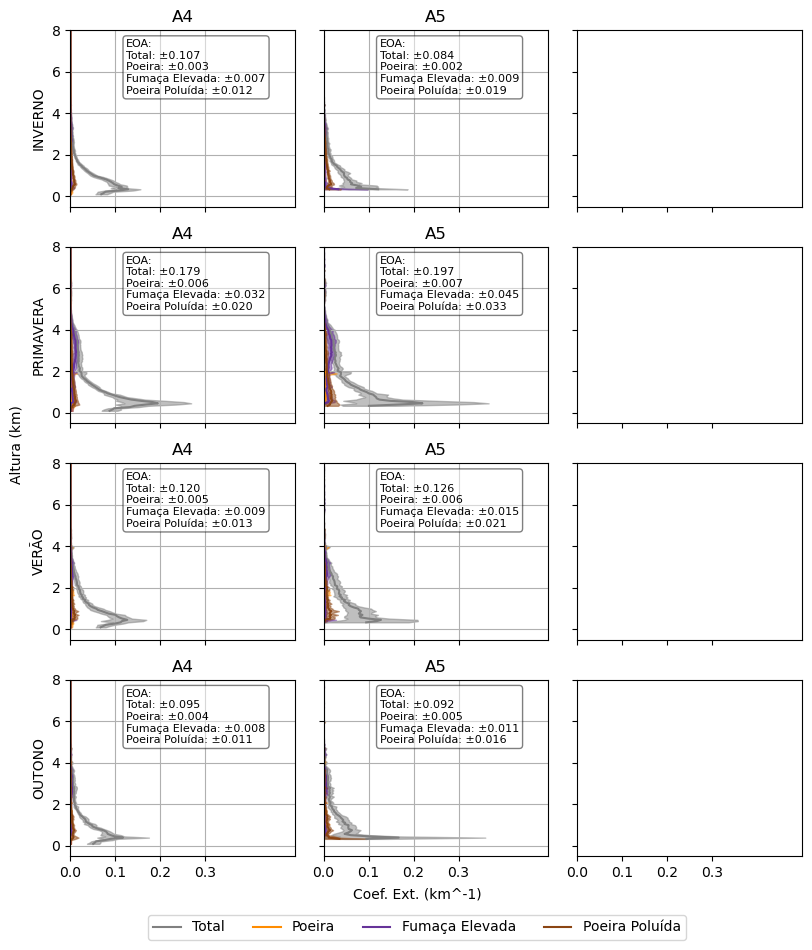

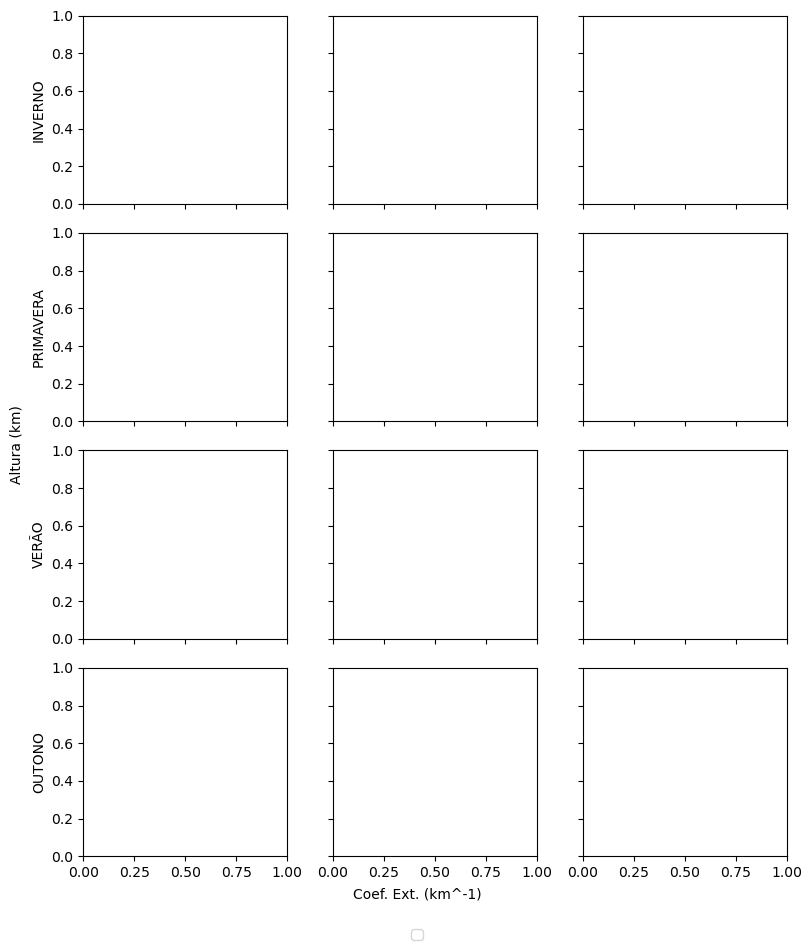

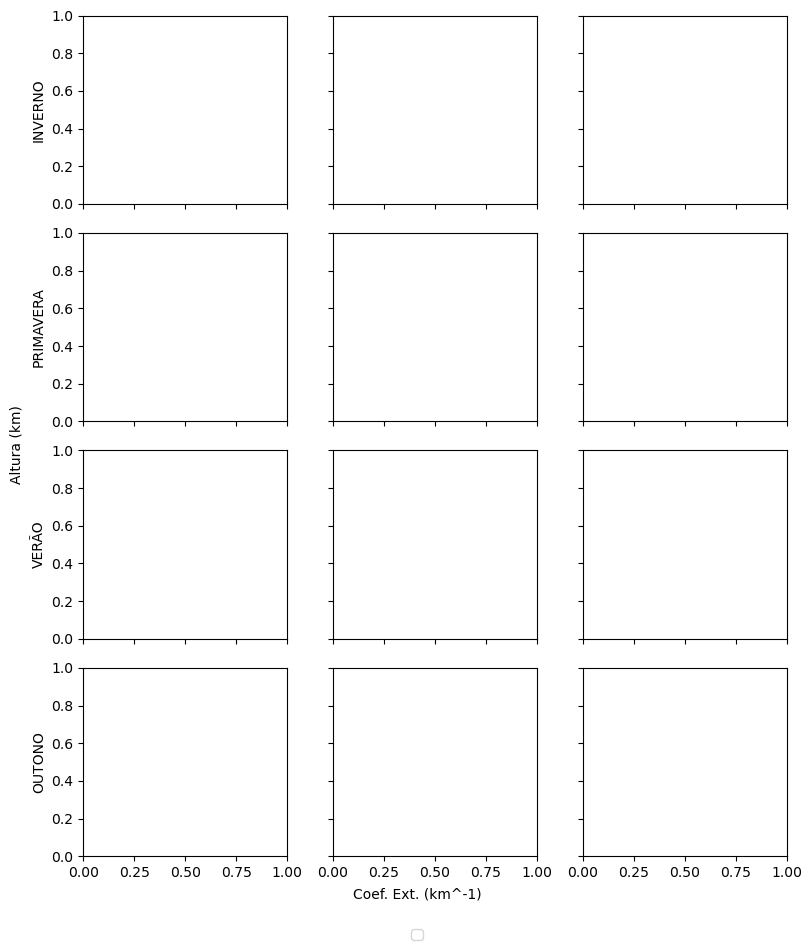

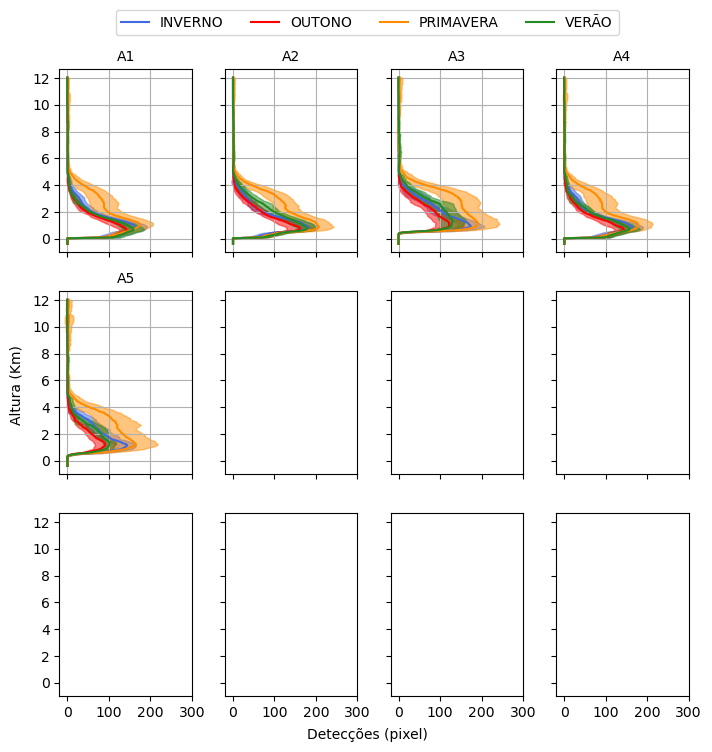

In [15]:
# Plots multiplas áreas
info_variaveis = info['Produtos']['Tropospheric_Aerosol_Profile']['Variáveis']
plots_multiplos_perfil_ce_eoa(perfil_media_sazonal, info_variaveis, niveis_altitude)
plot_multiplo_perfil_deteccao(perfil_media_sazonal, info_variaveis['Samples_Aerosol_Detected_Accepted'], niveis_altitude)

C:\Users\amori\Jupyter Notebook\OneDrive\LASA\Pasta_arquivos\plot_graficos.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(4, 4), facecolor='white')


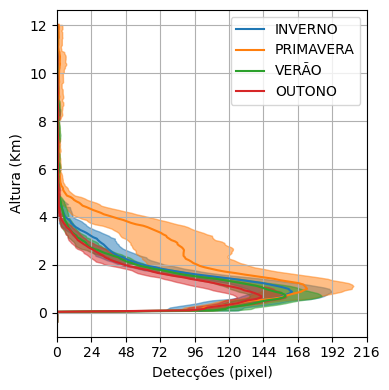

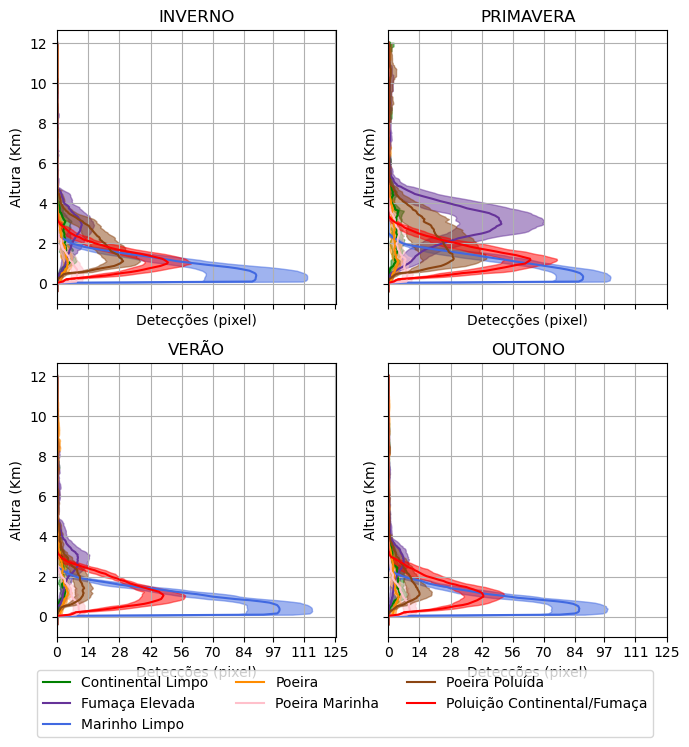

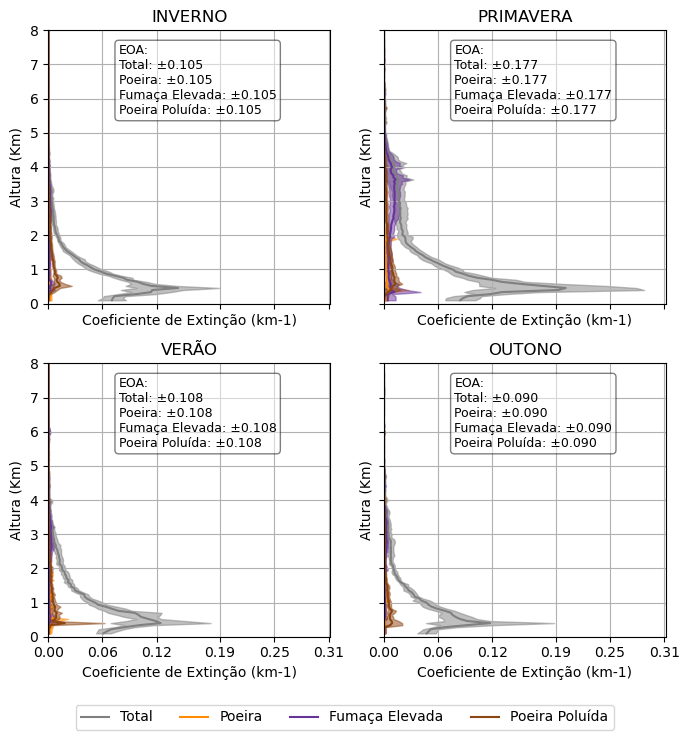

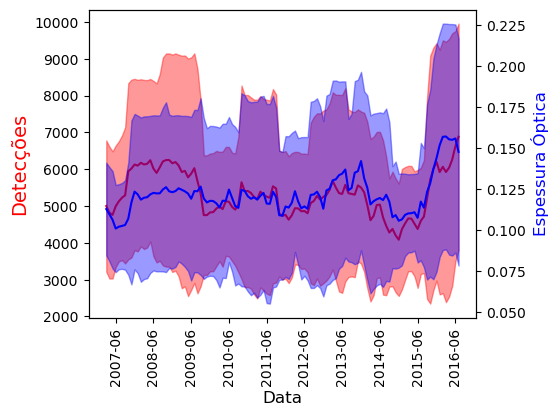

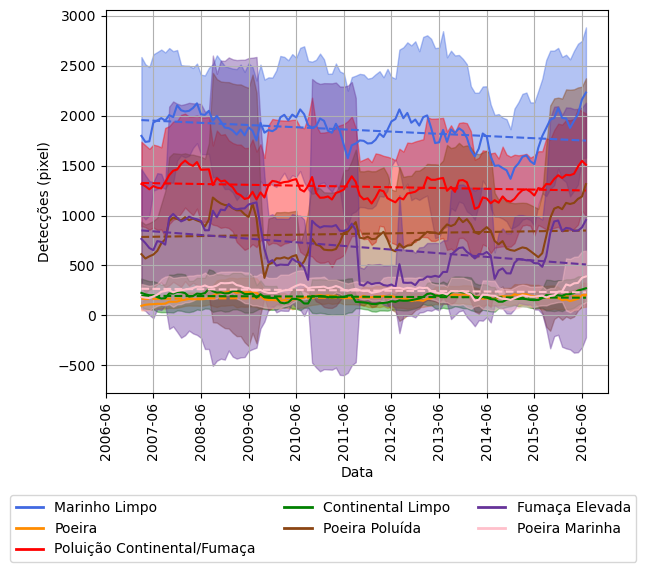

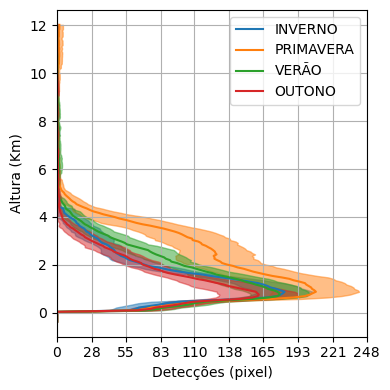

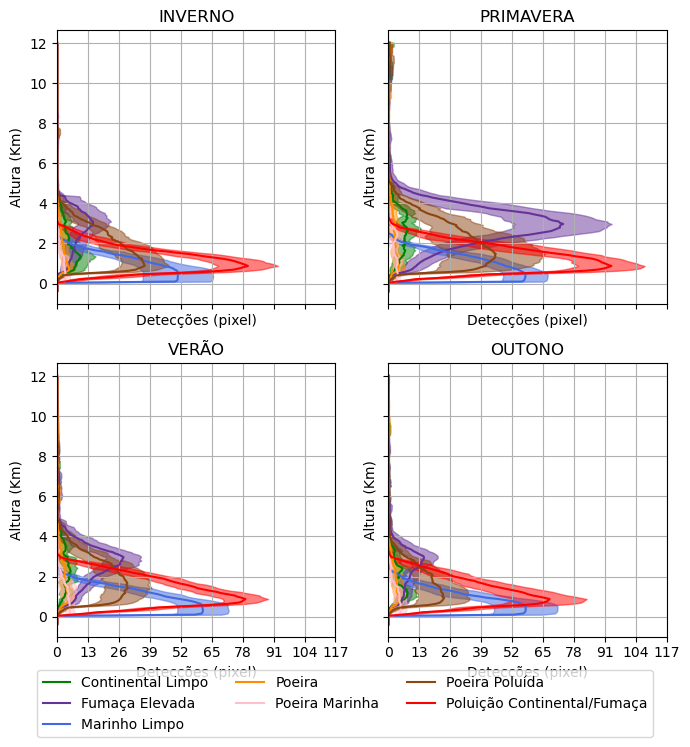

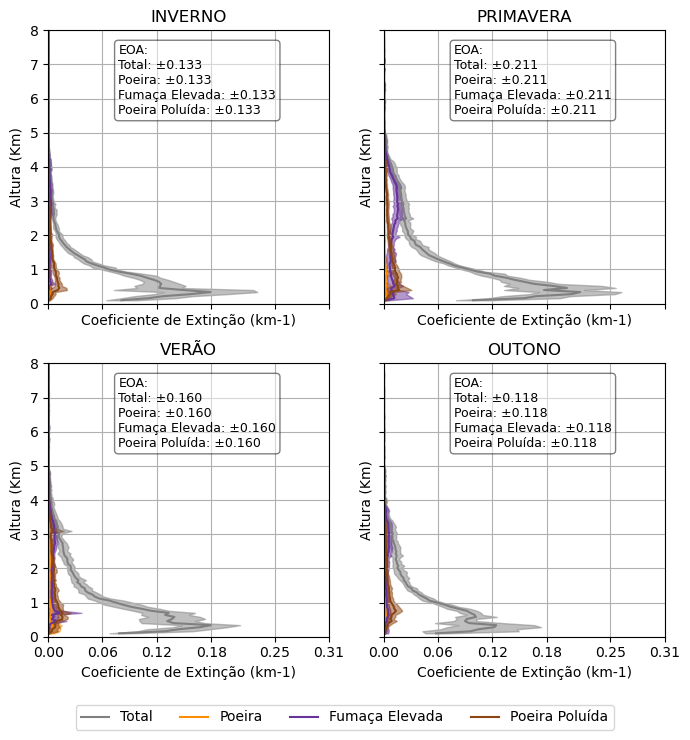

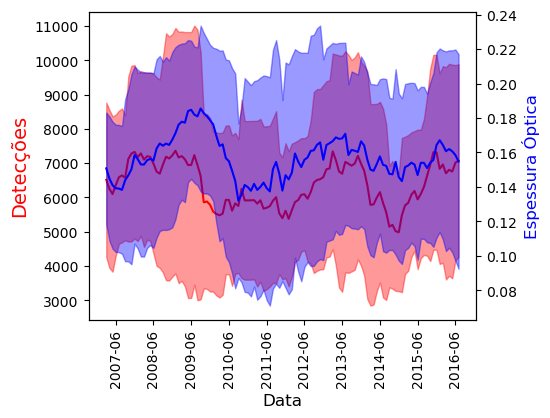

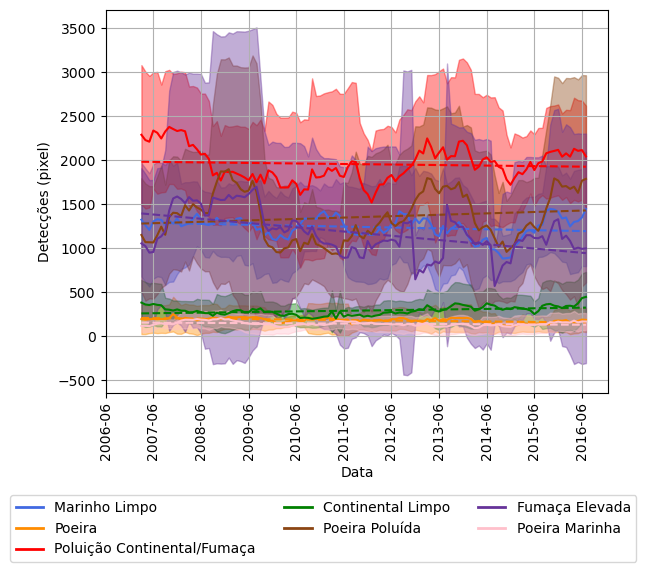

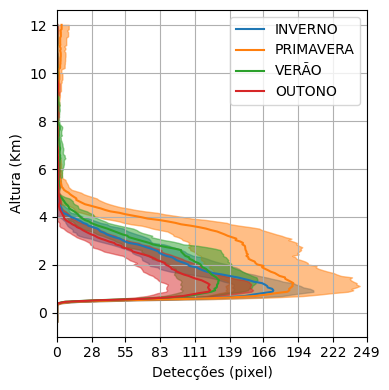

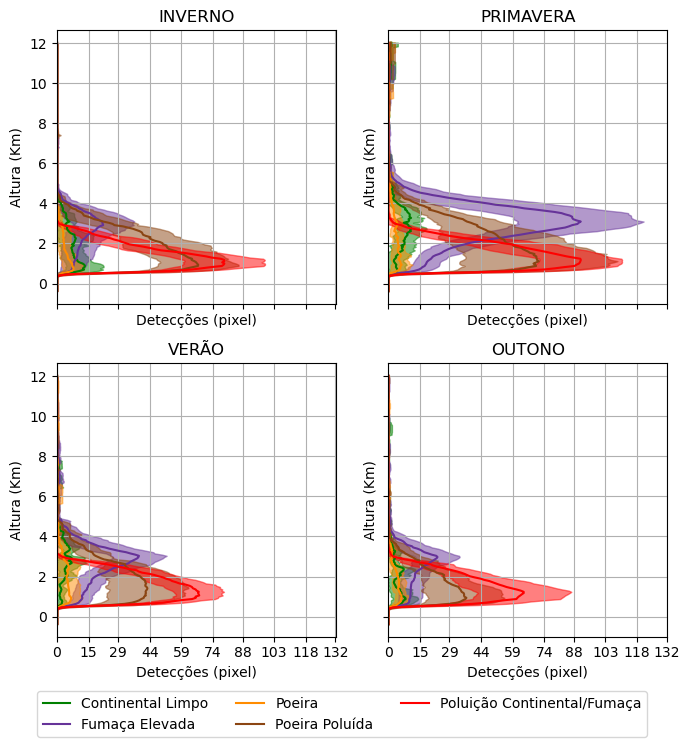

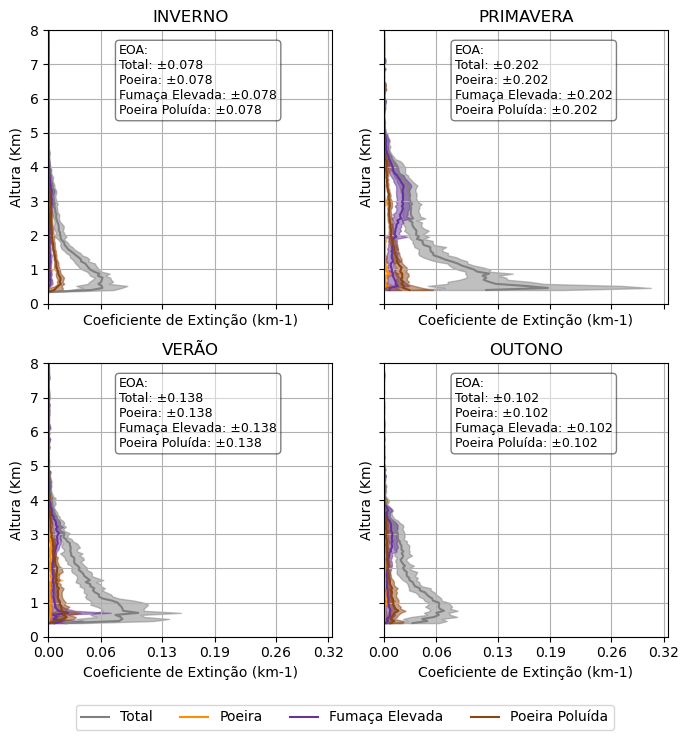

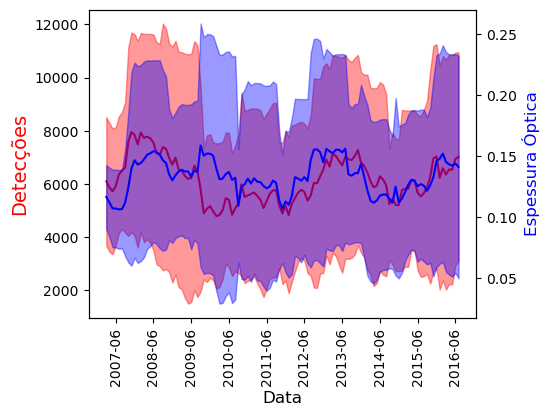

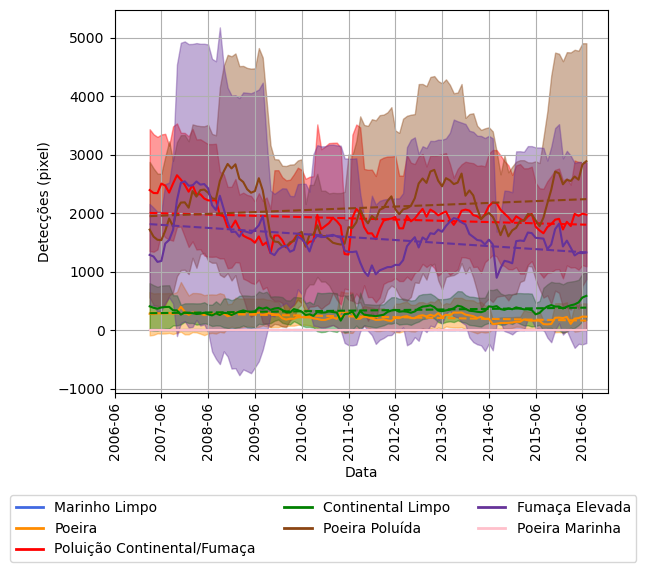

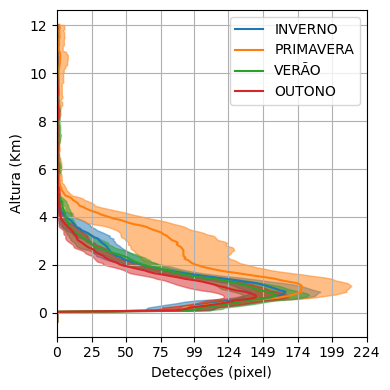

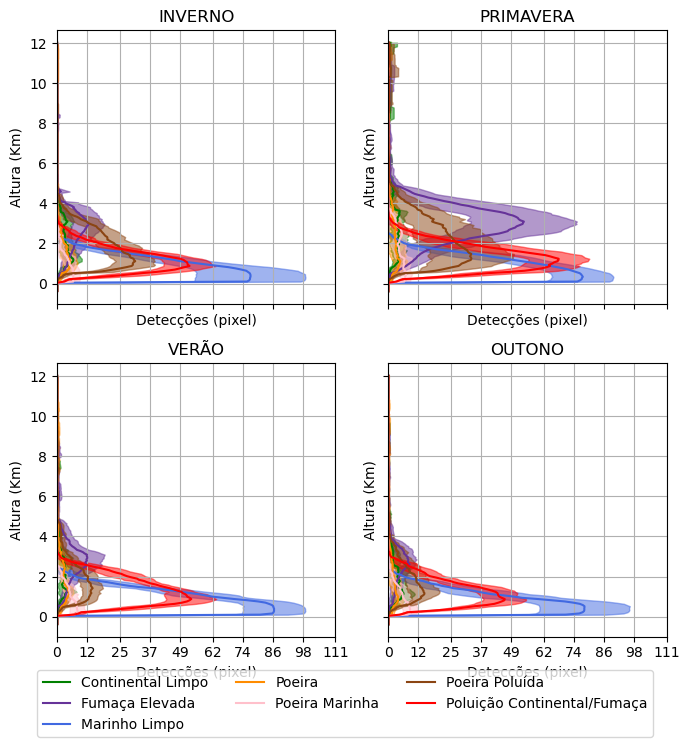

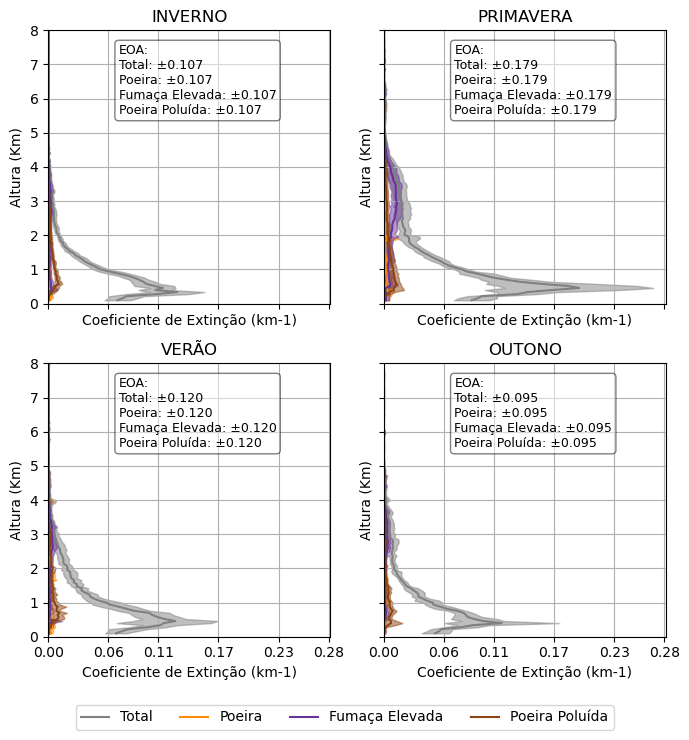

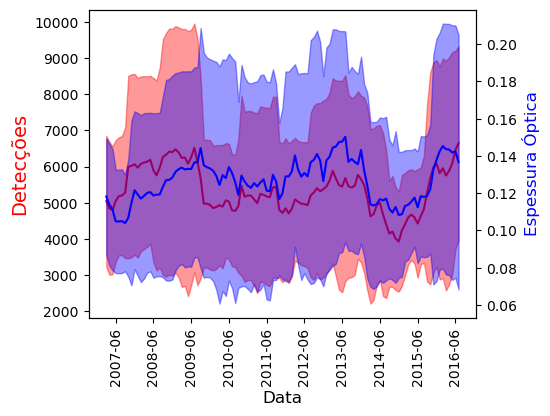

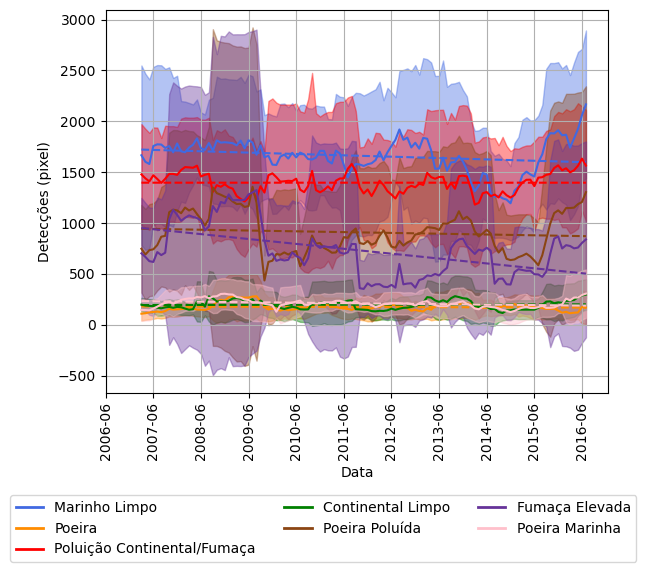

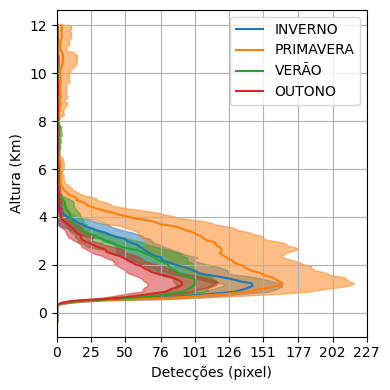

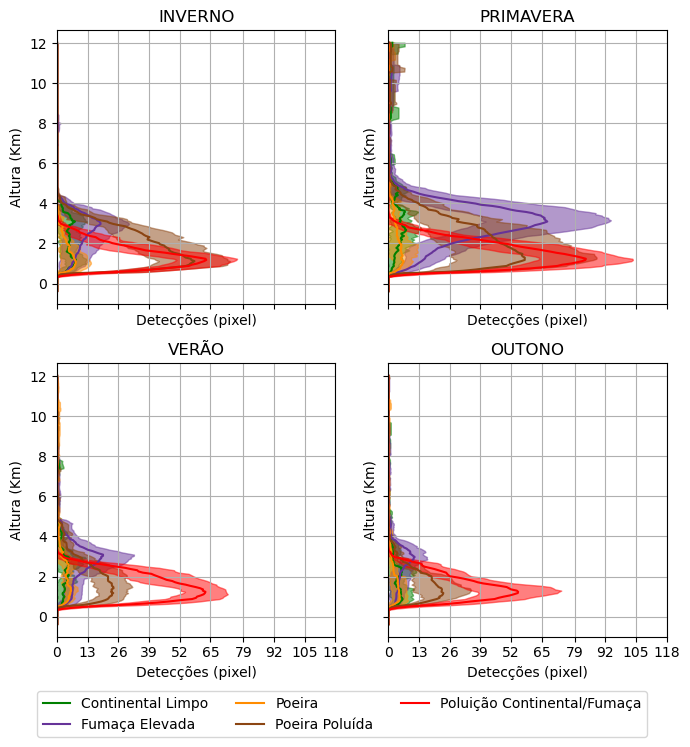

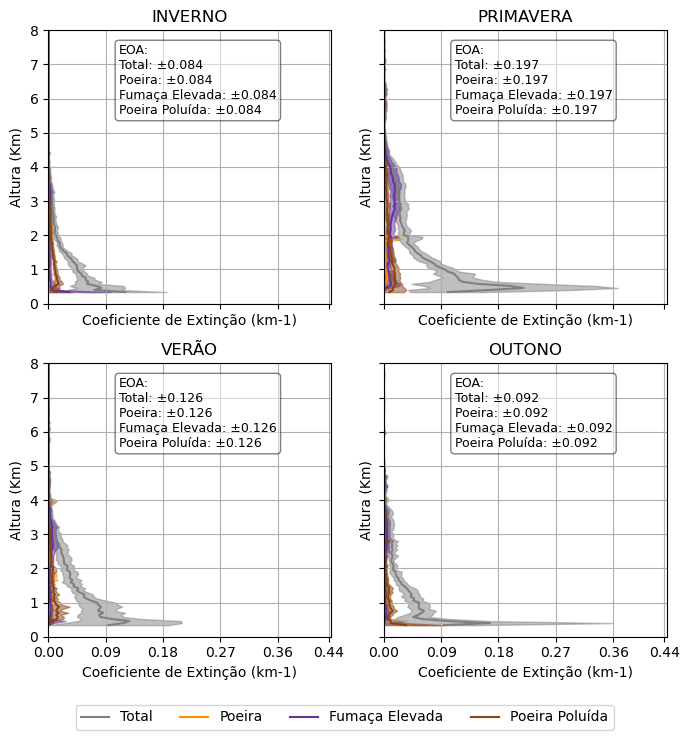

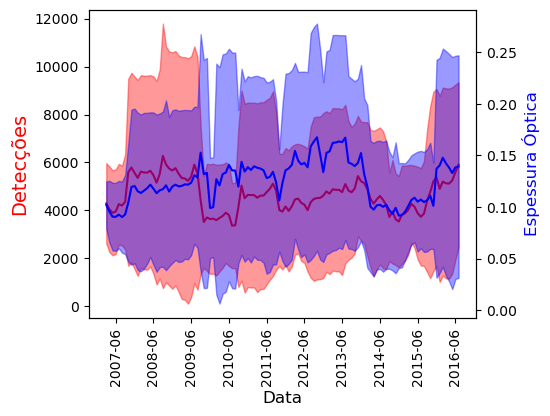

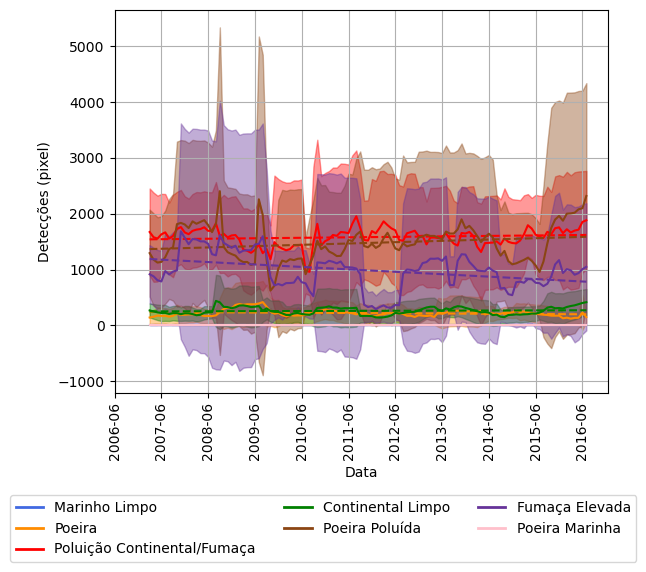

In [16]:
# Plots individuais por área
for area in dados.keys():
    plot_media_deteccoes_1d(perfil_media_sazonal[area]['Samples_Aerosol_Detected_Accepted'].copy().T, niveis_altitude, area)
    informacoes_variaveis = info['Produtos']['Tropospheric_Aerosol_Profile']['Variáveis']
    plot_deteccoes_sazonais_2d(perfil_media_sazonal[area]['Aerosol_Type'].copy().T, niveis_altitude, area, informacoes_variaveis['Aerosol_Type'])
    plot_coeficiente_extincao(perfil_media_sazonal[area].copy(), informacoes_variaveis, niveis_altitude, area)   
    plot_media_movel_deteccoes_eoa(dados[area]["Samples_Aerosol_Detected_Accepted"].copy(), dados[area]["AOD_Mean"].copy(), area)
    plot_media_movel_deteccoes_2d(dados[area]['Aerosol_Type'].copy(), info_variavel, area)
